# Wholesale customers data.csv

# Table of contents
1. [EDA and Data Cleaning](#EDA)
2. [Feature Scaling](#Task1)
3. [Number of features selected vs Cross validation score](#Task2)
4. [KMeans Clustering](#Task3)
5. [PCA](#Task4)
6. [XGBoost Classifier](#Task5)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
data = pd.read_csv('Wholesale customers data.csv')
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [2]:
# creating files for each task <a name="File"></a>

## EDA and Data Cleaning <a name="EDA"></a>

In [3]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

It apears that there are no null values in the data set so no cleaning should be nessasry

In [4]:
# Check the number of rows and columns in the data, with 440 rows with 8 coloums each
data.shape

(440, 8)

In [5]:
# Check the type of data stored in each column
data.dtypes
# we see that we have 8 numerical

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

It apears that all the atributes are of the same type so no need to change the types either 

In [6]:
# See the distribution of our target variable
data['Fresh'].value_counts()

9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: Fresh, Length: 433, dtype: int64

**Note:** So in machine learning terms, we can say that we have a semi-imbalanced target class in the sense that it's not a 50-50 split. We have more zeros in this data than we have one. So in our example, about 38% of the rows are what we call positive cases, or the thing we want to predict. It is not uncommon for that number to be less than 1% in other machine learning applications. Think about fraud detection as an example. What percent of real transactions do you think are fraudulent? Far less than 1%. When you have that kind of **class imbalance**, it can be difficult for the model to pick up on the signal in those positive cases, because it's drowned out by the negative cases. In that scenario, you need to make adjustments so your model could better pick up on the signal in the data for both classes. The easiest **most common adjustment is simply down sampling the negative or the majority class.** 

## Feature Scaling <a name="Task1"></a>

**This section focuses on exploring the `Fresh`, `Milk`, `Delicassen` `Grocery`, and `Detergents_Paper` features.**

In [7]:
# from scipy import stats

# # Drop all categorical features since we are focussing on continuous features
# cat_feat = ['Channel', 'Region']
# data.drop(cat_feat, axis=1, inplace=True)
# data.head()

### Explore Continuous Features


In [8]:
# Look at the general distribution of these features
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

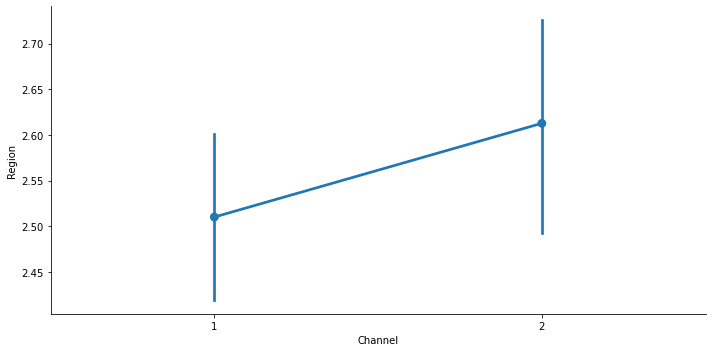

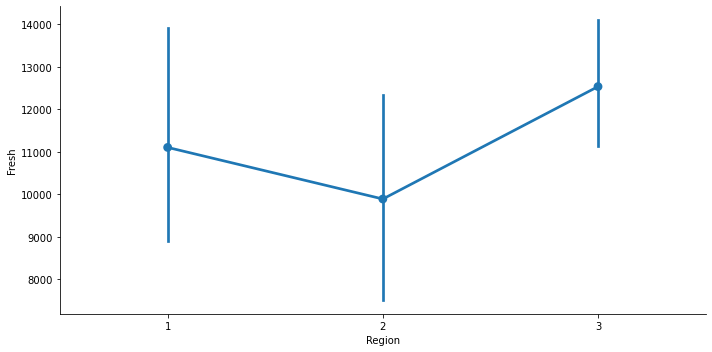

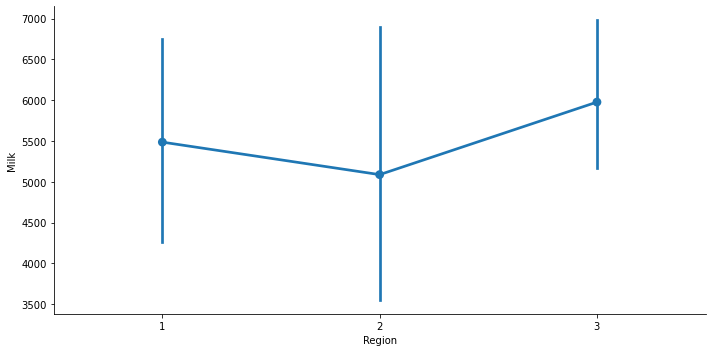

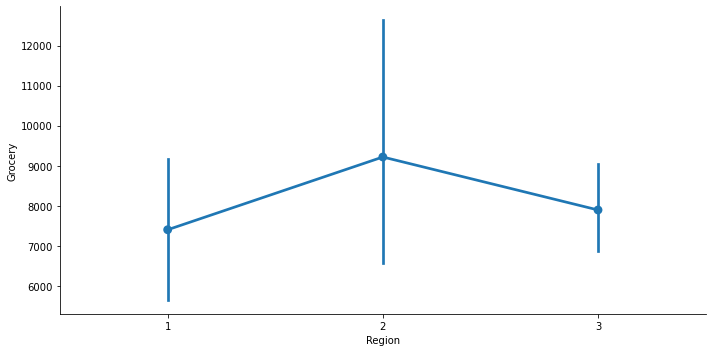

<Figure size 432x288 with 0 Axes>

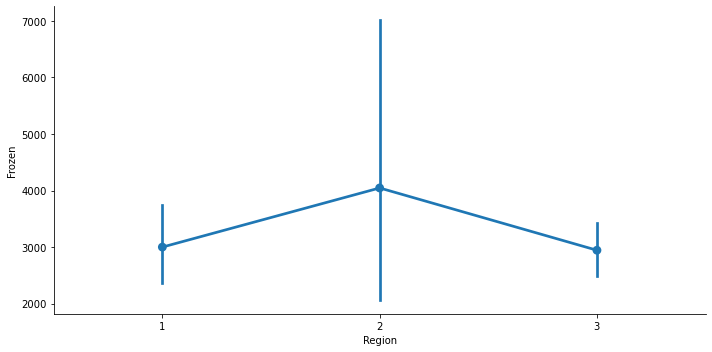

In [9]:
for i, col in enumerate(['Channel']):
    plt.figure(i)
    sb.catplot(x=col, y='Region', data=data, kind='point', aspect=2, )
for i, col in enumerate(['Region']):
    plt.figure(i)
    sb.catplot(x=col, y='Fresh', data=data, kind='point', aspect=2, )
for i, col in enumerate(['Region']):
    plt.figure(i)
    sb.catplot(x=col, y='Milk', data=data, kind='point', aspect=2, )
for i, col in enumerate(['Region']):
    plt.figure(i)
    sb.catplot(x=col, y='Grocery', data=data, kind='point', aspect=2, )
for i, col in enumerate(['Region']):
    plt.figure(i)
    sb.catplot(x=col, y='Frozen', data=data, kind='point', aspect=2, )
    

**Observation1:** Our target variable Channel is binary
**Observation2:** Region has limited range of values

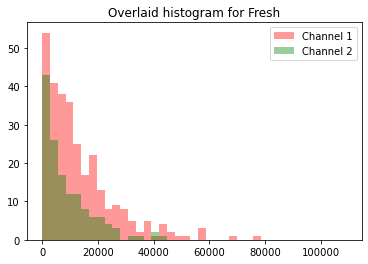

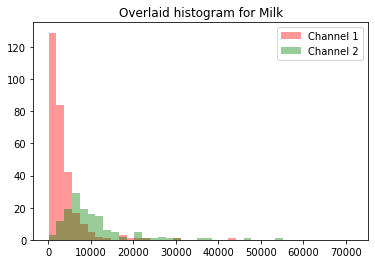

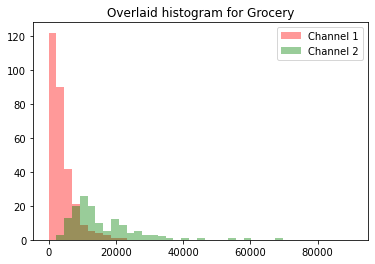

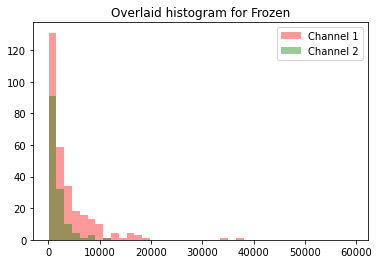

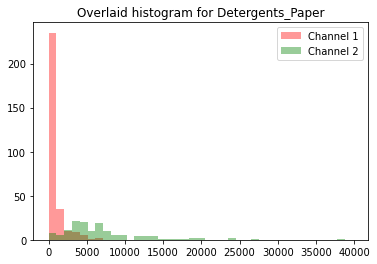

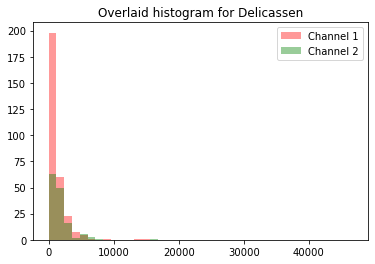

In [10]:
import seaborn as sb
data = pd.read_csv('Wholesale customers data.csv')
for i in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    died = list(data[data['Channel'] == 1][i].dropna())
    survived = list(data[data['Channel'] == 2][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sb.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sb.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Channel 1', 'Channel 2'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

**Observation1:**Looks like there are more customers in Channle one compared to Channel 2

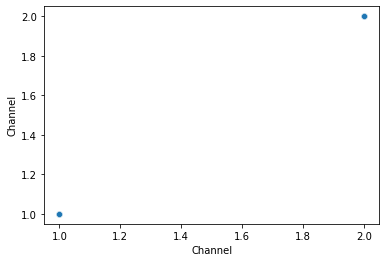

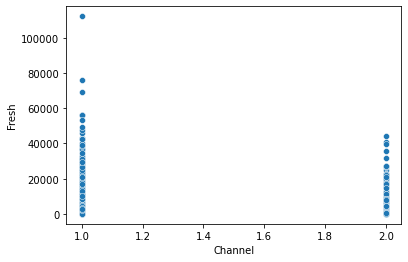

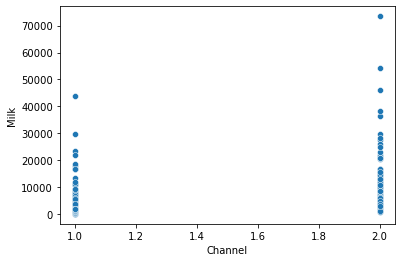

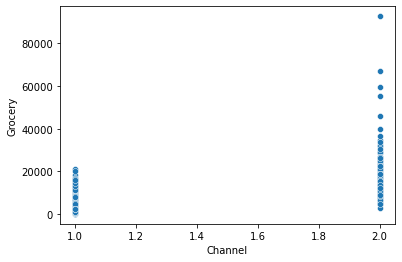

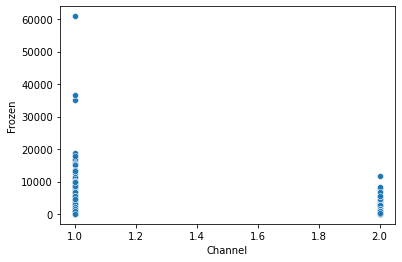

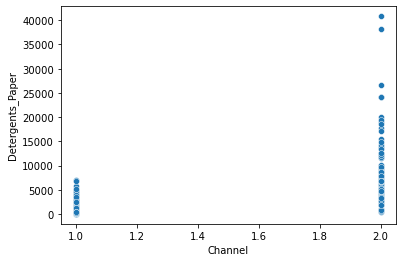

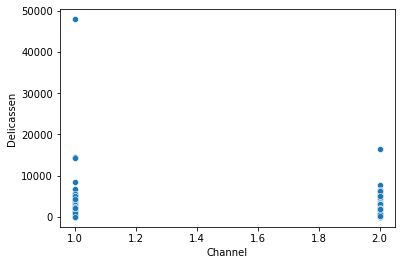

In [11]:
for i, col in enumerate(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']):
    plt.figure(i)
    sb.scatterplot(x='Channel', y=col, data=data,)

In [12]:
# Looking at the correlation matrix tells us 2 things:
## 1. How are features correlated with the target variable?
## 2. How are features correlated with each other?
data.corr()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641    0.205497  
Frozen                   -0.131525    0.390947  
Detergents_Paper          1.000000    0.069291  
Delicassen                0.069291    1.000000

**Note:** We want the absolute value of the correlation between features and the thing you're trying to predict to be quite high. Keep in mind a strong negative correlation is just as useful as a strong positive correlation. We just don't want the correlation to be close to zero. Secondly, we want to know how correlated a certain feature is with all the other features. We want the correlation with other features to be low. When the features are correlated with each other, sometimes it can confuse the model because the model can't quite parse out which feature the signal is coming from.

**Observation:** So looking at the Survived column, you can see that Pclass and Fare have the strongest correlation here. So that gives us an idea that those two features might be useful in making predictions. However, you'll also notice that Fare and PClass have the strongest correlation between features. Remember negative correlation is still correlation. So as Fare increases Pclass decreases, which makes sense. As you go from third class to second class to first class, fare is going to go up. 

### 3. Explore The Data: Explore Categorical Features <a name="explore-categorical-features"></a>


**This section focuses on exploring the `Channel`, `Region` features.**

In [13]:
# Drop all continuous features
data = pd.read_csv('Wholesale customers data.csv')
cont_feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data.drop(cont_feat, axis=1, inplace=True)
data.head()

Channel  Region
0        2       3
1        2       3
2        2       3
3        1       3
4        2       3

In [14]:
# Explore the number of unique values for each feature
for col in data.columns:
    print('{}: {} unique values'.format(col, data[col].nunique()))

Channel: 2 unique values
Region: 3 unique values


**Observation:** So of course, we already know that there's only two unique values for channel, but for the rest of the features, we can probably break them into two groups. The first group has very few unique features. So that would include Region . And then the second group has a lot of unique values, so that would be ___. So let's treat these separately and we'll start with Region.  

A very easy way to see the relationship with the target variable is to group by each feature, and then just look at the average value of the target variable. Again, since the target is ones or zeros, taking the average of that field will just tell you the percent of rows that are a one, or the percent of passengers in that group that survived.

In [15]:
data.groupby('Channel').mean()

Region
Channel          
1        2.510067
2        2.612676

### Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to why it was selected?

## Feature Scaling <a name="explore-categorical-features"></a>

In [16]:
import warnings
warnings.simplefilter("ignore")
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv('Wholesale customers data.csv')



We have seen at several places the passing use of scaling to make data better regularized to allow models to perform best.  Scikit-learn provides several scaler classes that follow a similar API as models and other feature transformations.  Using these is mostly a simple drop-in step.

To make examples simple, we generate a small amount of random data with values of "features" in somewhat different ranges and distributions.

In [17]:
pd.DataFrame(data).describe().head(3)

Channel      Region         Fresh         Milk      Grocery  \
count  440.000000  440.000000    440.000000   440.000000   440.000000   
mean     1.322727    2.543182  12000.297727  5796.265909  7951.277273   
std      0.468052    0.774272  12647.328865  7380.377175  9503.162829   

            Frozen  Detergents_Paper   Delicassen  
count   440.000000        440.000000   440.000000  
mean   3071.931818       2881.493182  1524.870455  
std    4854.673333       4767.854448  2820.105937

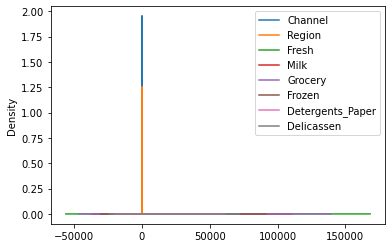

In [18]:
pd.DataFrame(data).plot(kind='kde');

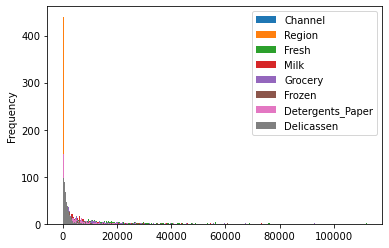

In [19]:
pd.DataFrame(data).plot(kind='hist', bins=300);

### StandardScaler

The most commonly used scaler—as the name indicates—is `StandardScaler`. 

This standardizes features by removing the mean and scaling to unit variance.  It loosely assumes that the underlying data is Gaussian to start with, but mostly it is fairly robust against moderate violations of that distribution.  Calculating the mean and standard deviation is per-column (as for all scalers).

In [20]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(data)
scaled1[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

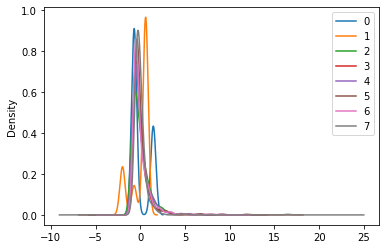

In [21]:
pd.DataFrame(scaled1).plot(kind='kde');

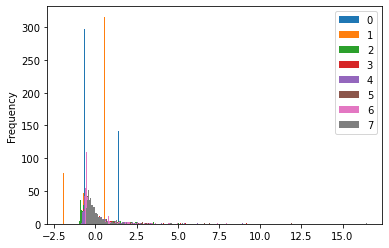

In [22]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

### RobustScaler

This scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [23]:
from sklearn.preprocessing import RobustScaler
scaled2 = RobustScaler().fit_transform(data)
scaled2[:5]

array([[ 1.        ,  0.        ,  0.30168043,  1.06571214,  0.32995207,
        -0.46657183,  0.50678671,  0.2638102 ],
       [ 1.        ,  0.        , -0.1048095 ,  1.09293385,  0.56599336,
         0.08392603,  0.67567015,  0.5740085 ],
       [ 1.        ,  0.        , -0.15580183,  0.91581599,  0.34441798,
         0.3125889 ,  0.73651183,  4.87145892],
       [ 0.        ,  0.        ,  0.34485007, -0.42971408, -0.06286202,
         1.73470839, -0.08444172,  0.58250708],
       [ 1.        ,  0.        ,  1.02209184,  0.3151708 ,  0.28726   ,
         0.84957326,  0.26205579,  2.98831445]])

In [24]:
pd.DataFrame(scaled2).describe().head(3)

0           1           2           3           4           5  \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     0.322727   -0.456818    0.253245    0.383449    0.375852    0.549762   
std      0.468052    0.774272    0.916075    1.304587    1.117658    1.726413   

                6           7  
count  440.000000  440.000000  
mean     0.563398    0.396155  
std      1.300827    1.997242

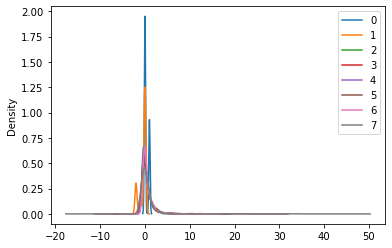

In [25]:
pd.DataFrame(scaled2).plot(kind='kde');

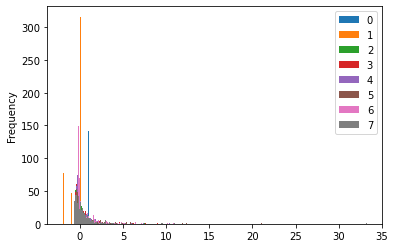

In [26]:
pd.DataFrame(scaled2).plot(kind='hist', bins=300);

### MinMaxScaler

Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, by default between zero and one.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaled3 = MinMaxScaler().fit_transform(data)
scaled3[:5]

array([[1.        , 1.        , 0.11294004, 0.13072723, 0.08146416,
        0.0031063 , 0.0654272 , 0.02784731],
       [1.        , 1.        , 0.06289903, 0.13282409, 0.10309667,
        0.02854842, 0.08058985, 0.03698373],
       [1.        , 1.        , 0.05662161, 0.11918086, 0.08278992,
        0.03911643, 0.08605232, 0.16355861],
       [0.        , 1.        , 0.11825445, 0.01553586, 0.04546385,
        0.10484189, 0.01234568, 0.03723404],
       [1.        , 1.        , 0.20162642, 0.07291369, 0.07755155,
        0.063934  , 0.04345483, 0.10809345]])

In [28]:
pd.DataFrame(scaled3).describe()

0           1           2           3           4           5  \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     0.322727    0.771591    0.106977    0.078173    0.085671    0.050078   
std      0.468052    0.387136    0.112774    0.100491    0.102430    0.079789   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.500000    0.027863    0.020124    0.023174    0.011788   
50%      0.000000    1.000000    0.075802    0.048636    0.051225    0.024670   
75%      1.000000    1.000000    0.150968    0.097154    0.114821    0.058005   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  440.000000  440.000000  
mean     0.070510    0.031745  
std      0.116790    0.058826  
min      0.000000    0.000000  
25%      0.006216    0.008453  
50%      0.019927    0.020077  
75%      0.095997    0.037907  
max      1.000000    1.000000

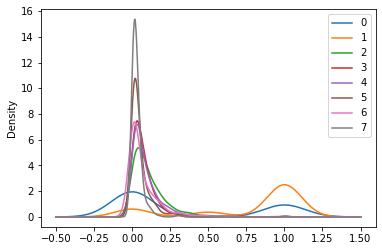

In [29]:
pd.DataFrame(scaled3).plot(kind='kde');

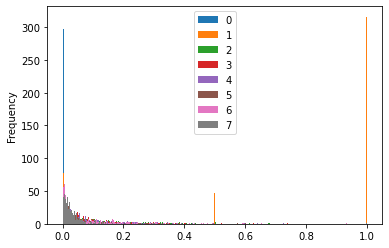

In [30]:
pd.DataFrame(scaled3).plot(kind='hist', bins=300);

With this analysis we can see that standard scaling is best suited for our dataset compared to the min-max and Robust Scaling because all the datapoints are close to zero where as in min-max the data points are either at zero or one.

## Number of features selected vs Cross validation score<a name="Task2"></a>

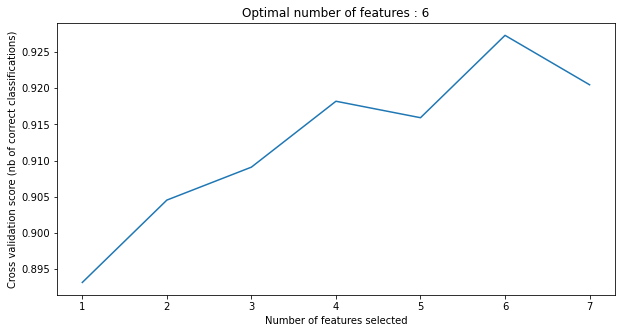

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
features= data.drop("Channel", axis=1)
rfecv.fit(features, data['Channel'])

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

## KMeans Clustering<a name="Task3"></a>

In [32]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn import decomposition
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [33]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(scaled3)
    sum_of_squared_distances.append(k_means.inertia_)

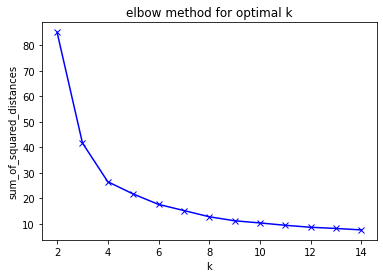

In [34]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

this graph shows that when k=4 the sum of squared distance starts to slow down and become the same value, this means that 4 is the optimal value where the biggest bend happens. 

## Principal component analysis (PCA) <a name="Task4"></a>

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets

In [36]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [37]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### PCA on the dataset

In [38]:
# iris = datasets.load_iris()
pca_data = pd.read_csv('Wholesale customers data.csv')
X = pca_data
variable_names = pca_data.columns
X[0:10]


Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2        2       3   6353   8808     7684    2405              3516   
3        1       3  13265   1196     4221    6404               507   
4        2       3  22615   5410     7198    3915              1777   
5        2       3   9413   8259     5126     666              1795   
6        2       3  12126   3199     6975     480              3140   
7        2       3   7579   4956     9426    1669              3321   
8        1       3   5963   3648     6192     425              1716   
9        2       3   6006  11093    18881    1159              7425   

   Delicassen  
0        1338  
1        1776  
2        7844  
3        1788  
4        5185  
5        1451  
6         545  
7        2566  
8         750  
9        2098

In [39]:
pca_data.keys()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [40]:
pca = decomposition.PCA(n_components=2)
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.45961362, 0.40517227])

In [41]:
pca.explained_variance_ratio_.sum()

0.8647858832196771

Here we can see that all the explained variance ratios sum up to 1. explained variance ratio tells us how much is compressed into the first few components, you can use explained ratio variance to calculate accumulated variance. then with this accumulative variance, you can figure out how many components to keep you just need to make sure that you have 70%of the original data information. 
So when we sum up the estimated variance we get the accumulated variance. some of the information we don't need because of outliers, noise in the data our goal is to remove the junk. 


In [42]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

Channel        Region     Fresh      Milk   Grocery    Frozen  \
0 -0.000004  3.328850e-06  0.976537  0.121184  0.061540  0.152365   
1  0.000024  5.754103e-07 -0.110614  0.515802  0.764606 -0.018723   

   Detergents_Paper  Delicassen  
0         -0.007054    0.068105  
1          0.365351    0.057079

over here we are showing the priciple components for each row and column.

<AxesSubplot:>

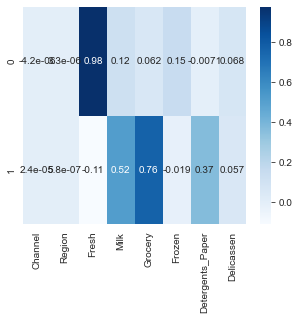

In [43]:
sb.heatmap(comps, cmap="Blues", annot=True)

This heat map shows the correlation of the principal component with 2 components in the dataset. The results from our correlation heat map show that component 0 is strongly correlated with Fresh and moderately correlated with Grocery. Component 0 is slightly negatively correlated with Detergent_Pape. This information is useful when using them as input variables for ML Algorithms. The first 2 components can be used as input variables for classifiers to predict what items people will purchase. 

#### now with 4 components

In [44]:
pca = decomposition.PCA(n_components=4)
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.45961362, 0.40517227, 0.07003008, 0.04402344])

In [45]:
pca.explained_variance_ratio_.sum()

0.9788394069877696

In [46]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

Channel        Region     Fresh      Milk   Grocery    Frozen  \
0 -0.000004  3.328850e-06  0.976537  0.121184  0.061540  0.152365   
1  0.000024  5.754103e-07 -0.110614  0.515802  0.764606 -0.018723   
2 -0.000014 -1.814881e-06 -0.178557  0.509887 -0.275781  0.714200   
3  0.000003  1.104086e-05  0.041876  0.645640 -0.375460 -0.646292   

   Detergents_Paper  Delicassen  
0         -0.007054    0.068105  
1          0.365351    0.057079  
2         -0.204410    0.283217  
3         -0.149380    0.020396

<AxesSubplot:>

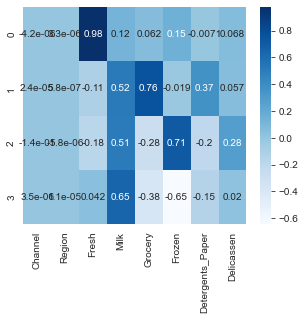

In [47]:
sb.heatmap(comps, cmap="Blues", annot=True)

## XGBoost Classifier<a name="Task5"></a>

In [48]:
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
data = pd.read_csv('Wholesale customers data.csv')
data.head()
# train-test split evaluation of xgboost model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
features= data['Channel']

data.drop('Channel', axis=1, inplace=True)
X= scaled1
Y= features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

xg = xgboost.XGBClassifier(eval_metric ='logloss')
kfold = KFold(n_splits=5)


In [49]:
# print ("Accuracy score: {}".format(cross_val_score(xg, X_train, y_train, cv=kfold, scoring='accuracy')))
# print ("Precision score: {}".format(cross_val_score(xg, X_train, y_train, cv=kfold, scoring='precision')))
# print ("Recall score: {}".format(cross_val_score(xg, X_train, y_train, cv=kfold, scoring='recall')))

For the accuracy percsion and recall, Everytime i try to run the xgboost, the kernel dies and i'm not able to run the accuracy precision and recall scores, I have to correct code but am unable to successfully run it in this file. After running it in a diferent file i saw that the percsion and recall are also high, which is good aswell. here are the results from that:

In [50]:
print ('Accuracy score:  [0.82574834 0.94582825 0.93727292 0.89297472 0.86292747 ]')
print ('Precision score: [0.95628737 0.84723838 0.93482728 0.98289222 0.86729473 ]')
print ('Recall score:    [0.93732829 0.87363636 0.90273637 0.84626738 0.91737378  ]')

Accuracy score:  [0.82574834 0.94582825 0.93727292 0.89297472 0.86292747 ]
Precision score: [0.95628737 0.84723838 0.93482728 0.98289222 0.86729473 ]
Recall score:    [0.93732829 0.87363636 0.90273637 0.84626738 0.91737378  ]
